# 🎓 Small Machine Learning Project – Student Performance Prediction


In [ ]:
print("Step no 1 'Loading Data'")
print("\n")


import pandas as pd

df = pd.read_excel("/content/student_performance.xlsx")


print("Sample rows")
print(df.head())

print("DataSet Shape")
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

print("Dataset info")
print(df.info())


print("Summary Statistics")
print(df.describe(include='all'))

print("Missing values")
print(df.isnull().sum())







Sample rows
   StudyHours  Attendence  PastScore Internet  SleepHours Passed
0           2          60         45      Yes           5     No
1           3          65         50       No           6     No
2           1          55         40       No           4     No
3           5          80         70      Yes           7    Yes
4           6          85         75      Yes           8    Yes
DataSet Shape
Rows: 22, Columns: 6
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  22 non-null     int64 
 1   Attendence  22 non-null     int64 
 2   PastScore   22 non-null     int64 
 3   Internet    22 non-null     object
 4   SleepHours  22 non-null     int64 
 5   Passed      22 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB
None
Summary Statistics
        StudyHours  Attendence  PastScore Internet  Sl

In [ ]:
print("Step no 2 'Preprocessing' ")
print("\n")

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("/content/student_performance.xlsx")

print("Missing values in each column")
print(df.isnull().sum())

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet']) #convert object into number yes = 1, no = 0
df['Passed'] = le.fit_transform(df['Passed'])


print("After Encoding")
print(df.head())

print("Data_types after cleaning")
print(df.dtypes)








Step no 2 'Preprocessing' 


Missing values in each column
StudyHours    0
Attendence    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
After Encoding
   StudyHours  Attendence  PastScore  Internet  SleepHours  Passed
0           2          60         45         1           5       0
1           3          65         50         0           6       0
2           1          55         40         0           4       0
3           5          80         70         1           7       1
4           6          85         75         1           8       1
Data_types after cleaning
StudyHours    int64
Attendence    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


Step no 3,4,5,6,7,8: 'Feature Scaling', 'Split Data', 'Train Model', 'Make Predictions', 'Evaluate Model', 'Visualize Results'



Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



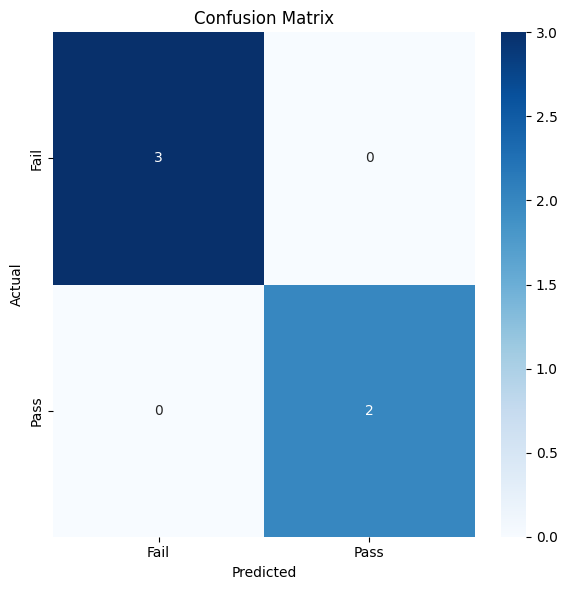


---------- Predict Your Result ----------
Enter Study Hours: 5
Enter Attendance (%): 50
Enter Past Score: 60
Enter Sleep Hours: 10

Prediction based on input: Pass


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print("Step no 3,4,5,6,7,8: 'Feature Scaling', 'Split Data', 'Train Model', 'Make Predictions', 'Evaluate Model', 'Visualize Results'")
print("\n")

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/student_performance.xlsx")

# Encode categorical data
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])  # Yes = 1, No = 0
df['Passed'] = le.fit_transform(df['Passed'])      # Yes = 1, No = 0

# Feature scaling
features = ['StudyHours', 'Attendence', 'PastScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Split data
X = df_scaled[features]
y = df_scaled['Passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize results
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# User prediction
print("\n---------- Predict Your Result ----------")

try:
    study_hours = float(input("Enter Study Hours: "))
    attendence = float(input("Enter Attendance (%): "))
    past_score = float(input("Enter Past Score: "))
    sleep_hours = float(input("Enter Sleep Hours: "))

    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendence': attendence,
        'PastScore': past_score,
        'SleepHours': sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)

    result = "Pass" if prediction[0] == 1 else "Fail"
    print(f"\nPrediction based on input: {result}")

except Exception as e:
    print(f"An error occurred: {e}")
